# 🏀 NBA Team Points Prediction Model
🙋 **authors**: szymond44, gwiazdan  
📆 **date**: 21-07-2025  


In [ ]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from data import ApiFetcher
from utils import distribution_calculating, check_distribution
from model import TeamEmbeddings

## ✨ Introduction

In [3]:
%reload_ext autoreload
api = ApiFetcher(2015, 2025)
df = api.get_numeric_dataframe()

In [4]:
print(api.data.shape[0])

11973


In [5]:
df0 = api.get_df()
df = api.df_with_id()

## 📈🔗 Correlation and Covariation exploration 

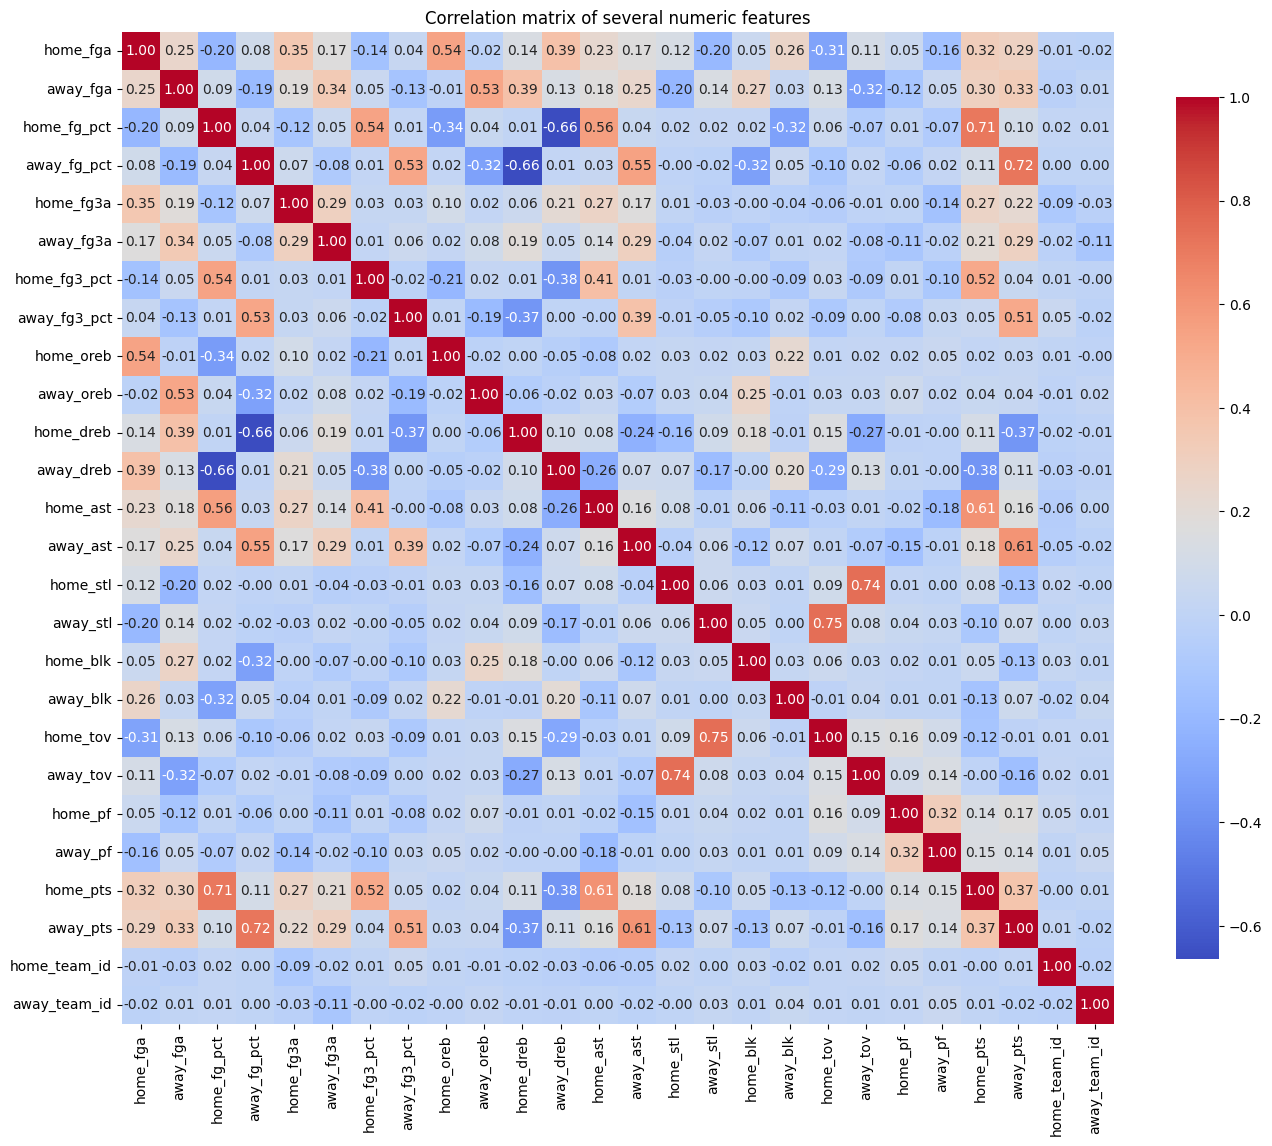

In [6]:
plt.figure(figsize=(16, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of several numeric features")
plt.show();

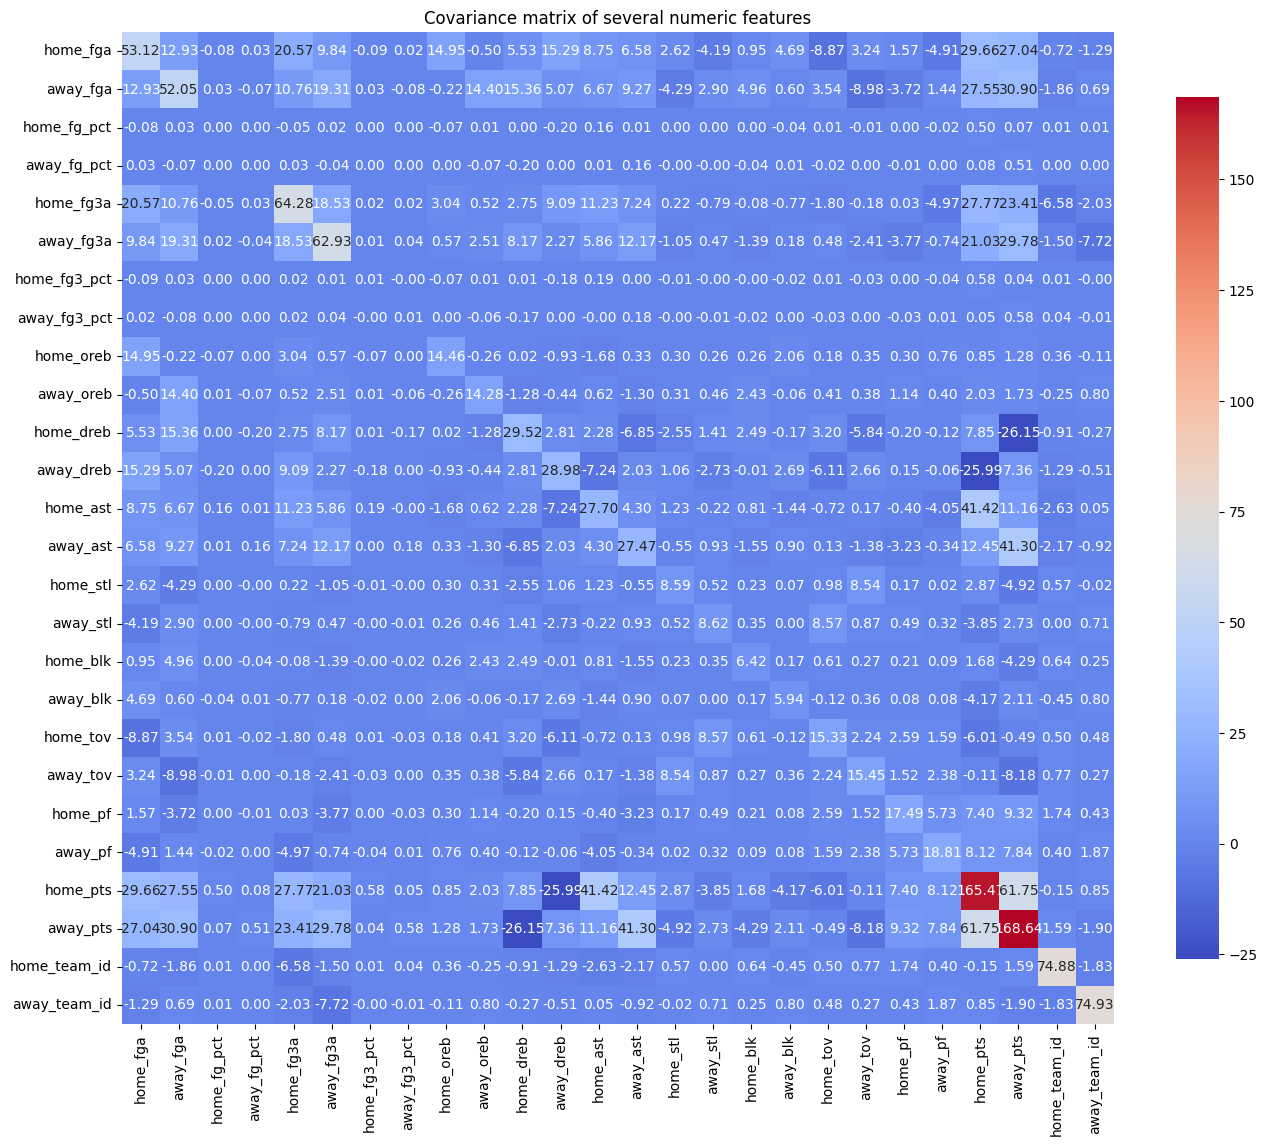

In [7]:
covariance_matrix = df.cov()
plt.figure(figsize=(16, 16))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Covariance matrix of several numeric features")
plt.show();

## 📶 Team points distribution

In [8]:
teams = sorted(set(df0['home_team']) | set(df0['away_team']))
team_to_idx = {team: idx for idx, team in enumerate(teams)}

def encode_row(row):
    vec = [0] * len(teams)
    vec[team_to_idx[row['home_team']]] = 1
    vec[team_to_idx[row['away_team']]] = -1
    return vec

df0['code'] = df0.apply(encode_row, axis=1) 
print(df0)
print(df0.columns)

       home_fga  away_fga  home_fg_pct  away_fg_pct  home_fg3a  away_fg3a  \
0            82        96        0.451        0.385         27         29   
1            87        94        0.425        0.404         19         29   
2            96        83        0.427        0.422         30         18   
3            86        93        0.349        0.452         18         23   
4            86        93        0.488        0.484         19         15   
...         ...       ...          ...          ...        ...        ...   
11968        74        86        0.514        0.430         35         42   
11969        90        85        0.389        0.376         45         39   
11970        98        89        0.469        0.449         43         42   
11971       104        87        0.500        0.437         40         28   
11972        84        97        0.512        0.474         32         39   

       home_fg3_pct  away_fg3_pct  home_oreb  away_oreb  ...  home_tov  \
0

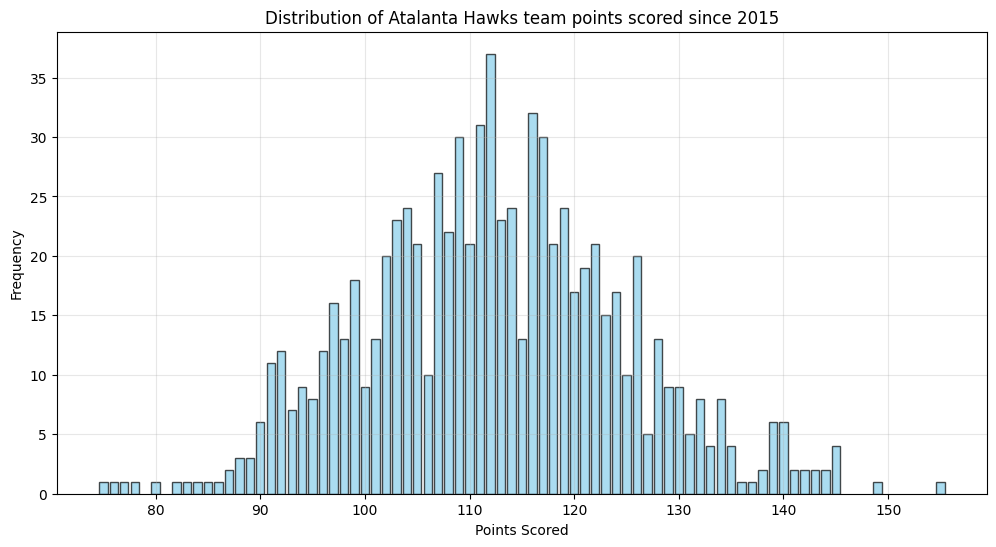

In [9]:
classical_distribution, home_distribution, away_distribution = distribution_calculating(df, 1)

points = list(classical_distribution.keys())
counts = list(classical_distribution.values())

plt.figure(figsize=(12, 6))
plt.bar(points, counts, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Atalanta Hawks team points scored since 2015')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
true_count, false_count = check_distribution(df)
print(f"Normality test results - {true_count/(false_count + true_count)*100:.1f}% distributions are normal")

Normality test results - 100.0% distributions are normal


All of the team points distribution since 2015 pass at least one of the normality tests (Shapiro-Wilk, D'Agostino's K-squared, Kolmogorov-Smirnov), so we can assume that the distribution is normal.